<a href="https://colab.research.google.com/github/TAUforPython/stohasticsignal/blob/main/baseline%20preprocess%20stochastic%20timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install scipy
#!pip install seaborn
!pip install -q MFDFA

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from scipy import signal

# создаем данные для обработки

## example 1 - USD/RUB exchange value

In [ ]:
# пример загрузки данных из внешнего файла csv
# загрузить курс доллара


# пример загрузки данных из внешнего файла csv
# загрузить курс доллара
file_link = 'https://github.com/TAUforPython/machinelearning/raw/refs/heads/main/test_datasets/UsdRubTime-AG-TS-format-032025.csv'
data_usdrub = pd.read_csv(file_link, sep = ';')

df_usdrub = pd.DataFrame(data_usdrub, columns = ['timestamp', 'target'])

df_usdrub['timestamp'] = pd.to_datetime(df_usdrub['timestamp'])

df_usdrub = df_usdrub.sort_values(by= 'timestamp', ascending=True)
df_usdrub = df_usdrub.reset_index()

print(df_usdrub.head)

y = df_usdrub['target'].values

N = len(df_usdrub['timestamp'])
t = np.linspace(1, N, N)

#t = df_usdrub['day'].values
#t = np.sort(t)

<bound method NDFrame.head of       index  timestamp   target
0      6759 1998-01-01     5,96
1      6758 1998-01-06    5,963
2      6757 1998-01-07    5,969
3      6756 1998-01-09    5,972
4      6755 1998-01-10    5,974
...     ...        ...      ...
6755      4 2025-03-25  83,8737
6756      3 2025-03-26   84,193
6757      2 2025-03-27  84,2065
6758      1 2025-03-28  83,8347
6759      0 2025-03-29  83,6813

[6760 rows x 3 columns]>


<ipython-input-111-e2cf26d5df28>:12: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_usdrub['timestamp'] = pd.to_datetime(df_usdrub['timestamp'])


## example 2 - EEG data

In [ ]:
!pip install -q mne

либо загрузить, либо сгенерировать сигнал. Запустить что-то одно.

In [ ]:
import mne
from google.colab import drive
drive.mount('/content/drive')
# путь к файлу на гугл-диске
edf_path = '/content/drive/MyDrive/edf_process/EDF_example_FS_healthy.edf'

# загрузка файла (данные в структуре переданы в переменную)
data_from_raw_edf = mne.io.read_raw_edf(edf_path, preload=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracting EDF parameters from /content/drive/MyDrive/edf_process/EDF_example_FS_healthy.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 28799  =      0.000 ...   224.992 secs...


In [ ]:
# ECG
#edf_path = '/content/drive/MyDrive/edf_process/ECG_example.edf'
edf_path = '/content/drive/MyDrive/edf_process/ECGrhmn_example.edf'

Using matplotlib as 2D backend.
['EEG Fp1-G2', 'EEG Fpz-G2', 'EEG Fp2-G2', 'EEG F7-G2', 'EEG F3-G2', 'EEG Fz-G2', 'EEG F4-G2', 'EEG F8-G2', 'EEG T3-G2', 'EEG C3-G2', 'EEG Cz-G2', 'EEG C4-G2', 'EEG T4-G2', 'EEG T5-G2', 'EEG P3-G2', 'EEG Pz-G2', 'EEG P4-G2', 'EEG T6-G2', 'EEG O1-G2', 'EEG O2-G2', 'EEG F9-G2', 'EEG T9-G2', 'EEG ECG-G2', 'EEG P9-G2', 'EEG F10-G2', 'EEG T10-G2', 'EEG P10-G2', 'Value MKR+-MKR-']


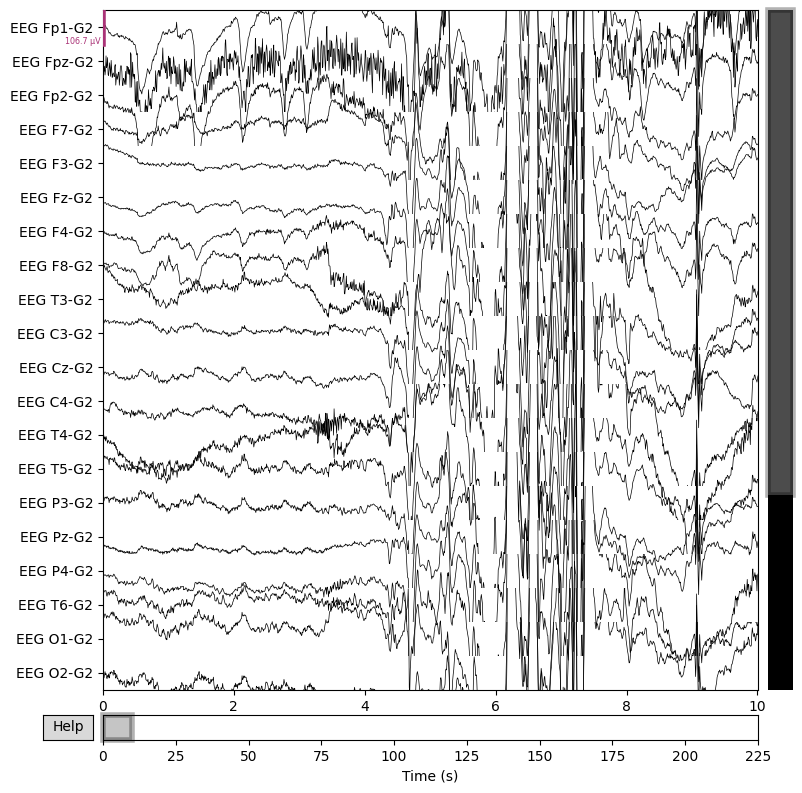

In [ ]:
# EDF - файл содержит многоканальную запись ЭЭГ
# ECG - файл содержит запись электрокардиограммы
data_from_raw_edf.plot(scalings = 'auto', show = False)
# список каналов из файла EDF
print(data_from_raw_edf.ch_names)

In [ ]:
eeg_data, eeg_times = data_from_raw_edf.get_data(return_times=True)
print('число отчетов во временном ряду:',len(eeg_times))
# устанавливаем диапазон для обработки данных
t_index_begin = 1500
t_index_end = 20000
t = eeg_times[t_index_begin:t_index_end]
# значение времени = конец сигнала
T = t[-1]
# число элементов во временном ряду
N = len(t)
# выгружаем в выходную переменную, например, первый (в Питоне он нулевой индекс имеет) канал
y = eeg_data[5, t_index_begin:t_index_end]

число отчетов во временном ряду: 28800


## Example 3 - Uniform Random Noise

In [39]:
# функция генерации сигнала стохастического
# additive white gaussian noise
def uniform_noise(a, b, data_size):
    t = np.arange(0, data_size, 1.)
    #random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size))

    for i in range(data_size):
        random.seed(int(t[i]))
        noise[i] = random.uniform(a, b)
        y[i] = 1.0 * noise[i]

    return y
# число точек в выборке
N = 60*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0
t = np.linspace(0, T, N)
fs = 1 / (t[1] - t[0]) #частота временного ряда

#signal_pure = 1*np.sin(2*np.pi*t)
#signal_pure = np.ones(len(t))
signal_pure = 1*np.sin(2*np.pi*t) + np.ones(len(t))*t
signal_with_noise = signal_pure + 1*uniform_noise(-1, 1, len(t))
#np.random.shuffle(signal_with_noise)
y = signal_with_noise

<ipython-input-39-6cc981424e7a>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = 1.0 * noise[i]


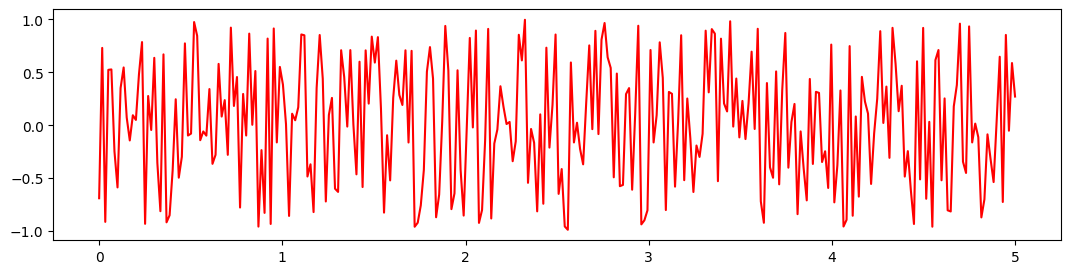

In [42]:
plt.figure(figsize=(13,3))
plt.plot(t,signal_pure-signal_with_noise,'r')
#plt.plot(t,y)

## Example 4 - случайные сигналы - Белый шум

In [43]:
# функция генерации сигнала стохастического
# additive white gaussian noise
def awgn(mu, noise_sigma, data_size, white_noise_power):
    t = np.arange(0, data_size, 1.)
    #random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size))

    for i in range(data_size):
        random.seed(int(t[i]))
        noise[i] = random.gauss(mu, noise_sigma)
        #noise[i] = random.uniform(0, 1)
        y[i] = white_noise_power * noise[i]

    return y
# число точек в выборке
N = 60*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0
t = np.linspace(0, T, N)
fs = 1 / (t[1] - t[0]) #частота временного ряда

#signal_pure = 1*np.sin(2*np.pi*t)
#signal_pure = np.ones(len(t))
signal_pure = 1*np.sin(2*np.pi*t) + np.ones(len(t))*t
signal_with_noise = signal_pure + 1*awgn(0, 0.5, len(t), 1)
#np.random.shuffle(signal_with_noise)
y = signal_with_noise

<ipython-input-43-7a9425947245>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = white_noise_power * noise[i]


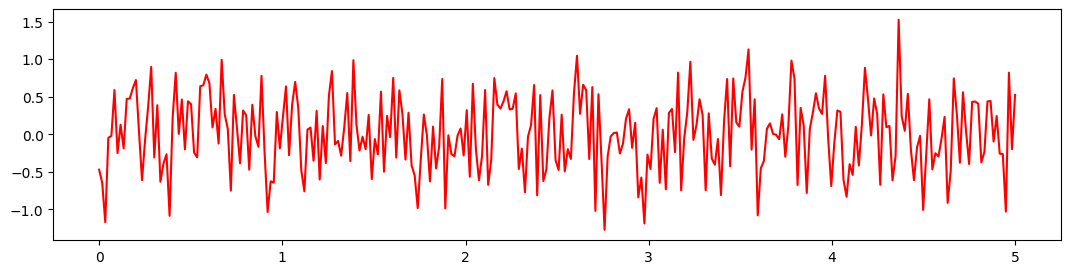

In [46]:
plt.figure(figsize=(13,3))
plt.plot(t,signal_pure - signal_with_noise,'r')
#plt.plot(t,y)

In [ ]:
def snr_white_noise(signal, mean_noise, target_snr_db):
    # Adding noise using target SNR
    # Set a target SNR
    # Calculate signal power and convert to dB
    sig_avg_watts = np.mean(signal**2)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    # Calculate noise according to [2] then convert to watts
    noise_avg_db = sig_avg_db - target_snr_db
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    # Generate an sample of white noise
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(signal))
    # Noise up the original signal
    y_awgn = signal + noise_volts
    return y_awgn

SNR = 10
# число точек в выборке
N = 60*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0
t = np.linspace(0, T, N)
fs = 1 / (t[1] - t[0]) #частота временного ряда

signal_pure = 1*np.sin(2*np.pi*t) + np.ones(len(t))*t
#signal_pure = np.ones(len(t))
signal_with_noise = snr_white_noise(signal_pure, 0, SNR)
y = signal_with_noise

# Example 5 - Fractional Brownian Motion
This process was shown useful in characterising the empirical feature discovered by Hurst (1951) in over 75 different geophysical phenomena (later known as long memory) in the 1960s (Mandelbrot, 1965; Mandelbrot and Van Ness, 1968)

The standard Brownian motion corresponds to the case of H = 0.5.
http://www.mysmu.edu/faculty/yujun/Research/fGn_estimation_JBES.pdf

In [68]:
# фрактальный стохастический сигнал
# Мандельброт в 1965 году придумал FGN


from MFDFA import fgn
# integration time and time sampling
T = 6
delta_t = 0.01

# Some drift theta and diffusion sigma parameters
theta = 1
sigma = 0.5

# The time array of the trajectory
t = np.arange(0, T, delta_t)
fs = 1 / (t[1] - t[0]) #частота временного ряда


# The fractional Gaussian noise
# H = Hurst exponent
H = 0.1
dB = (T ** H) * fgn(N = t.size, H = H)

# Initialise the array y
y = np.zeros([t.size])

# Integrate the process
for i in range(1, t.size):
    y[i] = y[i-1] - theta * y[i-1] * delta_t + sigma * dB[i]

signal_pure = 1*np.sin(2*np.pi*t) + np.ones(len(t))*t
#signal_pure = np.ones(len(t))
signal_with_noise = signal_pure + y

y = signal_with_noise

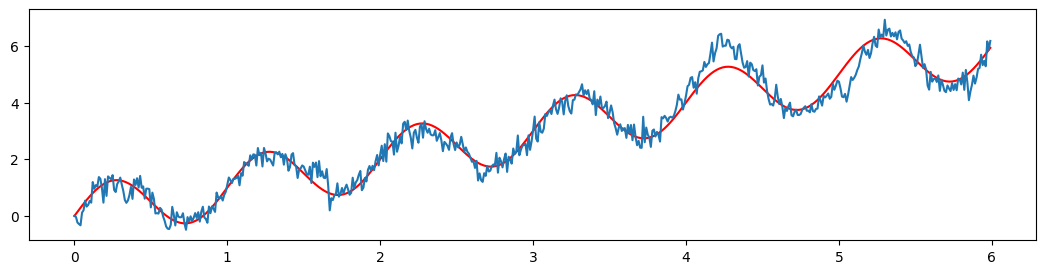

In [69]:
plt.figure(figsize=(13,3))
plt.plot(t,signal_pure - 0*signal_with_noise,'r')
plt.plot(t,y)

# Examlpe 5 - Markov chain timeseries

In [215]:

P = np.array([[0.5,0.5],[0.5,0.5]])

#Simulate the closing price of a company
closing_price = 0.0
#initialize pi_0
pi_0=np.array([0.5, 0.5])
#create a random delta in the range [0, 2.0]
delta = random.random()*2
#generate a random number in the range [0.0, 1.0]
r = random.random()
#if r <= P(X_t = +1), increase the closing price by delta,
#else decrease the closing price by delta
if r <= pi_0[0]:
    closing_price = closing_price+(100+delta)/100
else:
    closing_price = (closing_price - (100-delta)/100)
#accumulate the new closing price
closing_prices = [closing_price]
P_mul=P.copy()
T=365
closing_prices

[1.005949068376389]

In [238]:
range(T)

range(0, 365)

In [318]:
#P = np.array([[0.6,0.4],[0.7,0.3]])
closing_prices = []
P = np.array([[0.5,0.5],[0.5,0.5]])

#Simulate the closing price of a company
closing_price = 0.0
#initialize pi_0
pi_0=np.array([0.5, 0.5])
#create a random delta in the range [0, 2.0]
delta = random.random() * 2
#generate a random number in the range [0.0, 1.0]
r = random.random()
#if r <= P(X_t = +1), increase the closing price by delta,
#else decrease the closing price by delta
if r <= pi_0[0]:
    closing_price = closing_price*(100+delta)/100
else:
    closing_price = max(closing_price*(100-delta)/100,0.0)
#accumulate the new closing price
closing_prices = [closing_price]
P_mul=P.copy()
T=365
#now repeat this procedure 365 times
for i in range(T):
    #calculate the i-step transition matrix P^i
    P_mul=np.matmul(P_mul,P)
    #multiply it by pi_0 to get the state probability for time i
    pi_t = np.matmul(pi_0,P_mul)
    # create a random delta in the range [0, 2.0]
    delta = random.random() * 2
    # generate a random number in the range [0.0, 1.0]
    r = random.random()
    # if r <= P(X_t = +1), increase the closing price by delta,
    # else decrease the closing price by delta
    if r <= pi_t[0]:
        closing_price = max(closing_price*(100+delta)/100, 1.0)
    else:
        closing_price = closing_price*(100-delta)/100
    # accumulate the new closing price
    closing_prices.append(closing_price-1)


#t = range(T+1)
t = np.linspace(0, T-1, len(closing_prices))
noise = closing_prices

signal_pure = 1*np.sin(2*np.pi*t/T*6) + 1/T*np.ones(len(t))*t
signal_with_noise = signal_pure + noise

y = signal_with_noise

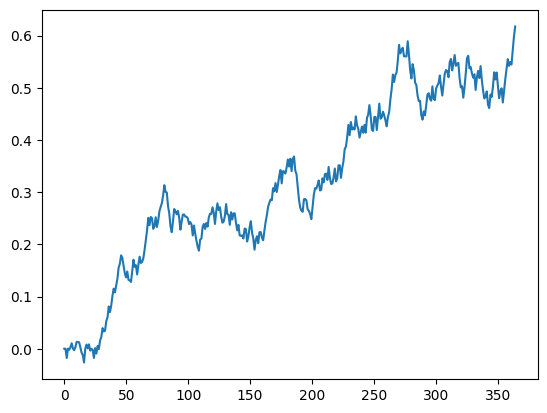

In [319]:
plt.plot(t,noise)

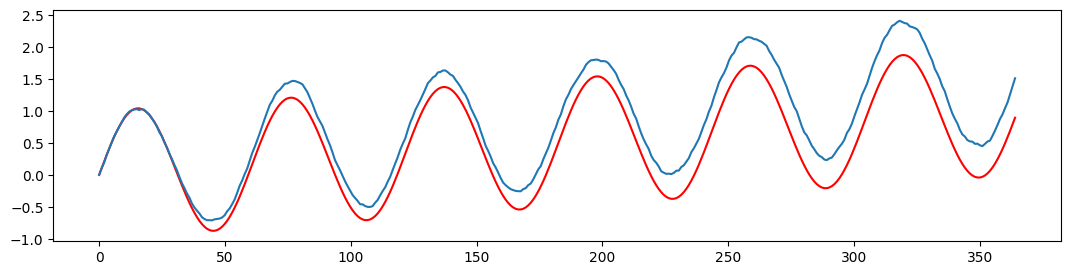

In [320]:
plt.figure(figsize=(13,3))
plt.plot(t,signal_pure - 0*signal_with_noise,'r')
plt.plot(t,y)

# Базовые методы исследования стохастического сигнала

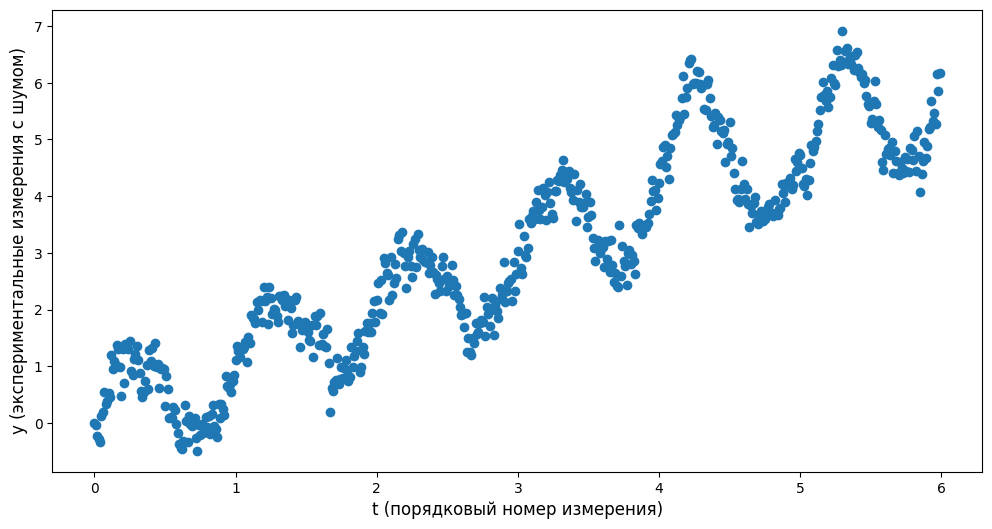

In [70]:
# изображение исследуемого графика
plt.figure(figsize = (12,6))
plt.plot(t, y, 'o')
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y (экспериментальные измерения с шумом)', fontsize=12)
plt.show()

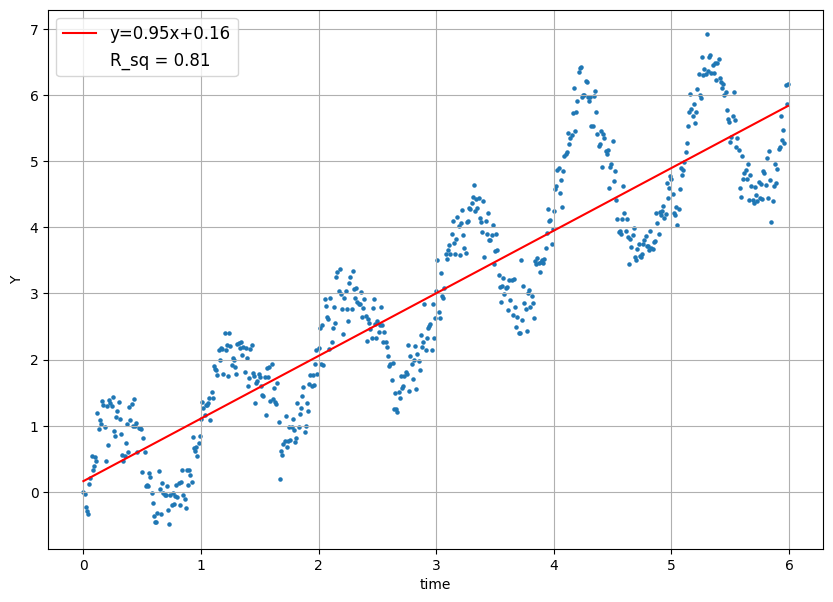

In [71]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(t,y)
line = slope*t + intercept

fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)

plt.scatter(t,y, s=5)
plt.plot(t, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.plot([], [], ' ', label='R_sq = '+'{:.2f}'.format(r_value**2))

plt.grid(True)
plt.legend(fontsize=12)
#plt.colorbar()
plt.xlabel('time')
plt.ylabel('Y')
plt.show()

In [72]:
y_nontrend = y-line

dy_nontrend_dt = np.array([0])
dy_nontrend_dt[0] = 0
for i in range(len(y)-1):
  dy_nontrend_dt = np.append(dy_nontrend_dt, (y_nontrend[i+1] - y_nontrend[i])/(t[i+1] - t[i]))

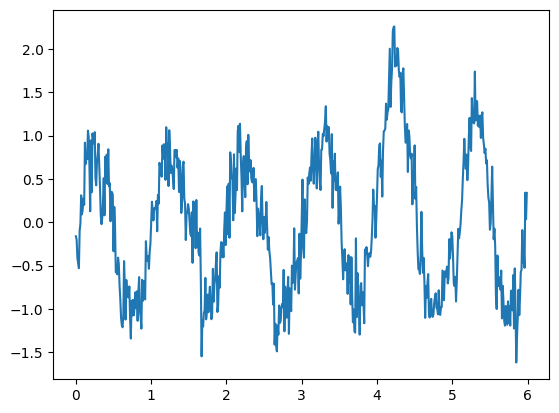

In [73]:
#plt.plot(t, dy_nontrend_dt)
plt.plot(t, y_nontrend)

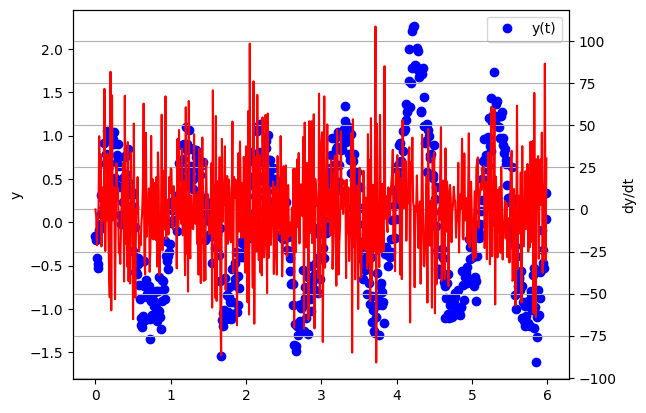

In [75]:

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(t,y_nontrend,'o',color='b', label= 'y(t)')
ax1.plot(t,dy_nontrend_dt,color='r', label= 'dy/dt')
ax.set_ylabel('y')
ax1.set_ylabel('dy/dt')
ax.legend()
#ax1.legend()
plt.grid()


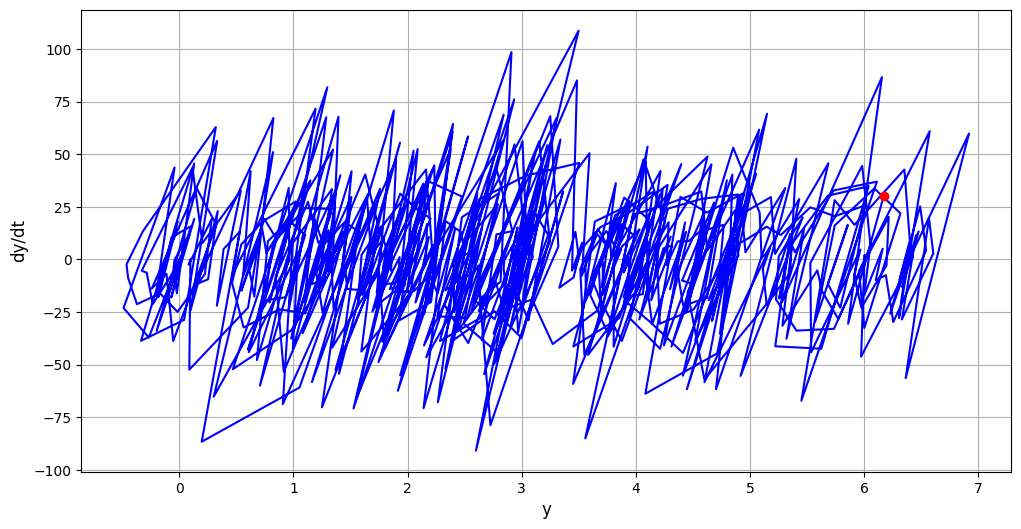

In [76]:
# изображение исследуемого графика
plt.figure(figsize = (12,6))
plt.plot(y, dy_nontrend_dt,'-b')
plt.plot(y[-1], dy_nontrend_dt[-1],'or')
plt.xlabel('y', fontsize=12)
plt.ylabel('dy/dt', fontsize=12)
plt.grid()
plt.show()

In [77]:
print("математическое ожидание = ", np.mean(y))
print("среднеквадратическое отклонение = " + "{:.3f}".format(np.std(y)))

математическое ожидание =  2.9980221116974493
среднеквадратическое отклонение = 1.823


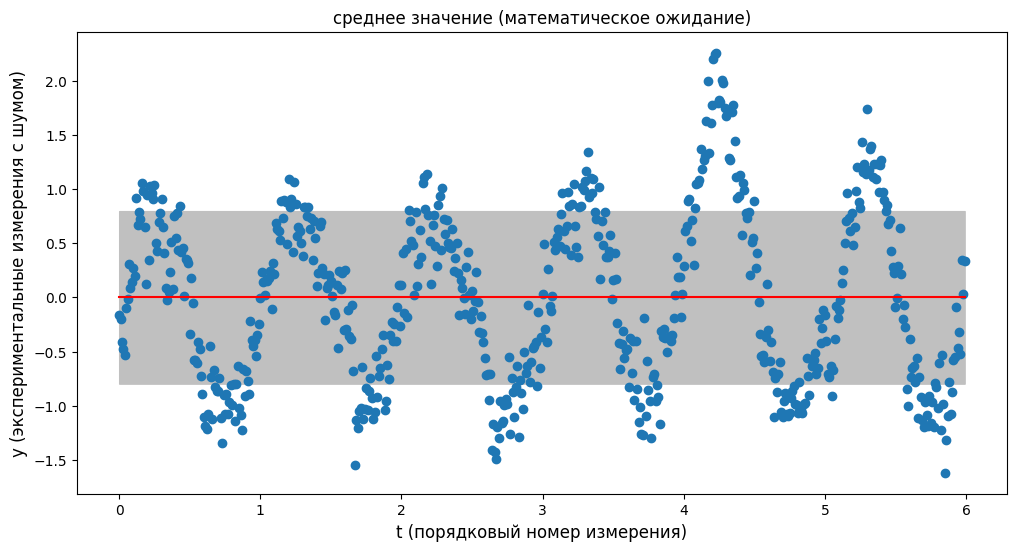

In [78]:
y = y_nontrend
plt.figure(figsize = (12,6))
plt.plot(t, y, 'o')
plt.plot([t[0], t[-1]],[np.mean(y), np.mean(y)],color='red')
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y (экспериментальные измерения с шумом)', fontsize=12)
plt.title("среднее значение (математическое ожидание)")
plt.fill_between(t, np.mean(y) + np.std(y), np.mean(y) - np.std(y), color = "silver")
plt.show()

In [79]:
def autocorr(signal, time_period):
  y_acorr = len(time_period) * [0]
  mean = sum(signal)/len(time_period)
  var = sum([(y - mean)**2 for y in signal]) / len(time_period)
  y_norm = [y - mean for y in signal]
  idx = range(len(time_period))
  for l in idx:
      c = 1
      if (l>0):
        tmp = [y_norm[l:][i] * y_norm[:-l][i] for i in range(len(signal) - l)]
        c = sum(tmp) / len(signal) / var
      y_acorr[l] = c
  return y_acorr

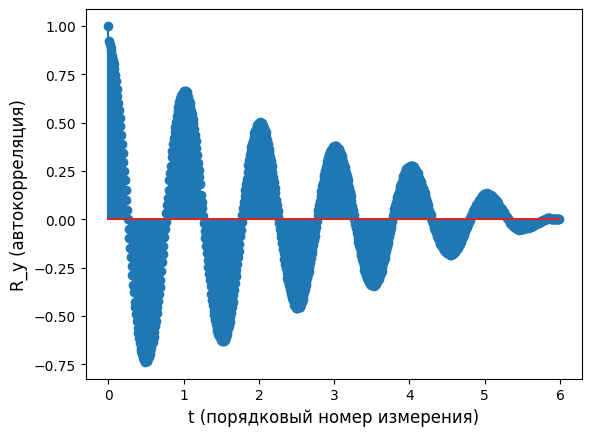

In [80]:
y_acorr = autocorr(y,t)
plt.stem(t,y_acorr)
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('R_y (автокорреляция)', fontsize=12)
plt.show()

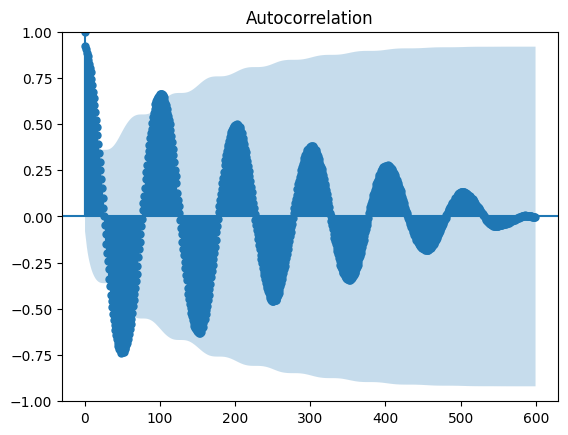

In [81]:
# автокорреляция
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(y, lags = len(y)-1, fft = True)
plt.show()

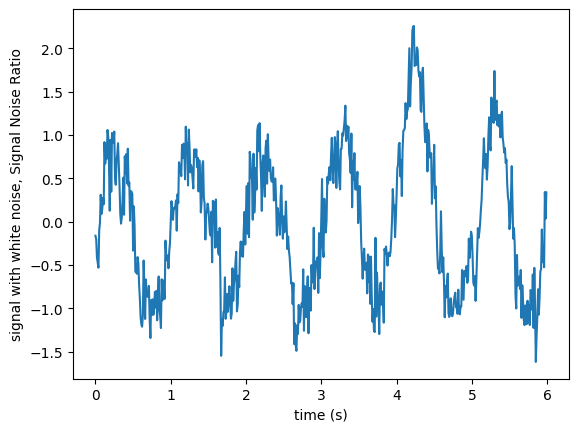

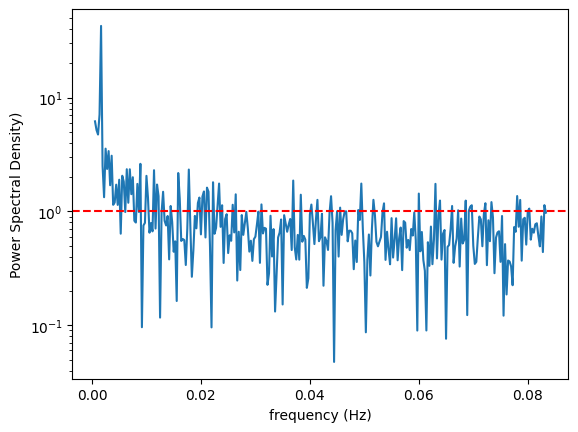

In [82]:
# спектральная плотность сигнала

f, psd = signal.periodogram(y, 1/T)

#plt.plot(t, signal_with_noise)
#plt.plot(t, signal_pure)
plt.plot(t,y)
plt.xlabel("time (s)")
plt.ylabel('signal with white noise, Signal Noise Ratio')
plt.show()

plt.semilogy(f[2:], np.sqrt(psd[2:]))
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectral Density)")
plt.axhline(1, ls="dashed", color="r")
plt.show()

# обработка датафреймов

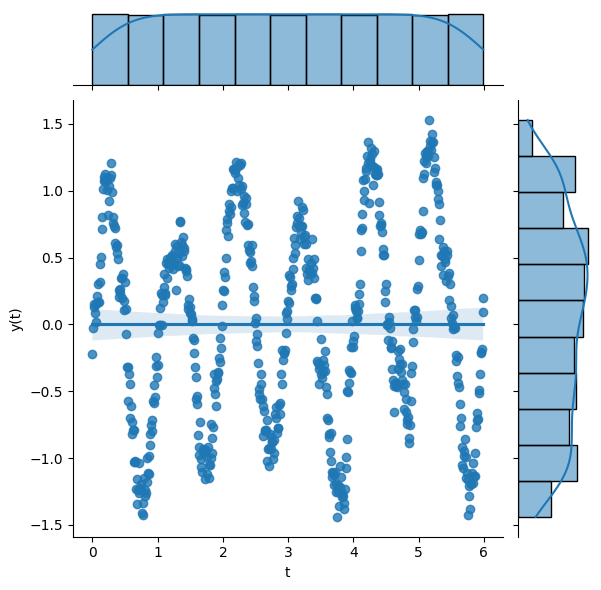

In [ ]:
# создаем датафрейм для красивого изображения данных
# сигнал случайный, формируем одну выборку

d = {'y(t)': y, 't': t}
df = pd.DataFrame(d)
seaborn.jointplot(data=df, x = "t", y = "y(t)",kind='reg')

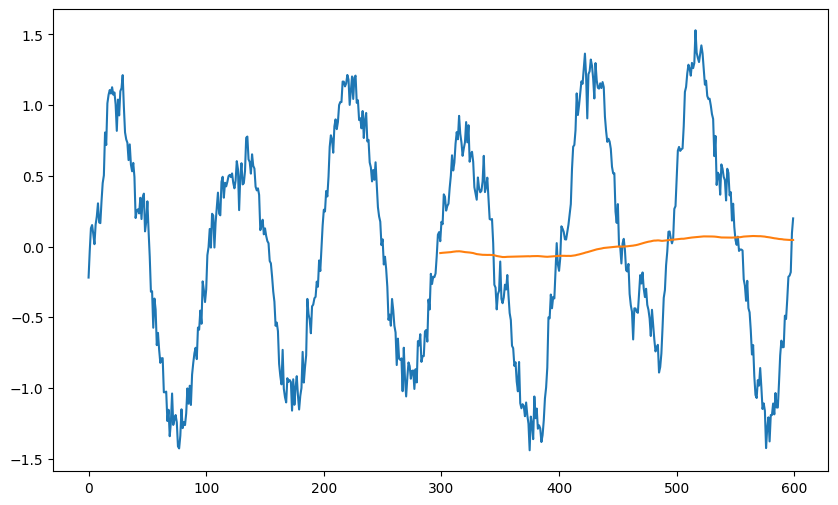

In [ ]:
# расчет скользящего среднего
df['y(t)'].plot(figsize=(10,6))
df['y(t)'].rolling(window = int(len(t)*0.5)).mean().plot()
y_mean = df['y(t)'].rolling(window = int(len(t)*0.5)).mean()

## Работа с кортежами

<ipython-input-79-0f5683c2a30d>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = np.sin(t[i]) + noise[i]


Text(0, 0.5, 'y (экспериментальные измерения)')

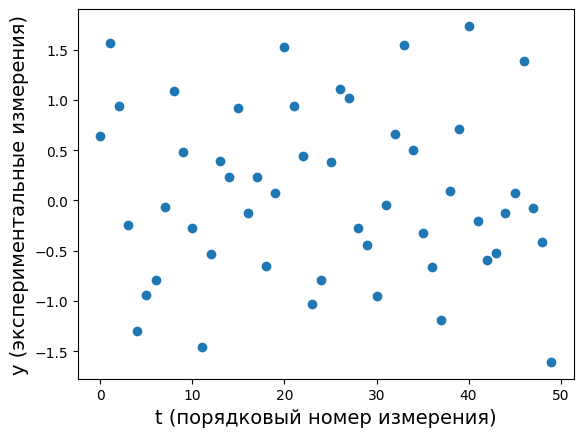

In [ ]:
def dataset_stohastic(mu, noise_sigma, data_size, random_state):
    t = np.arange(0, data_size, 1.)
    random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size))

    for i in range(data_size):
        noise[i] = random.gauss(mu, noise_sigma)
        y[i] = np.sin(t[i]) + noise[i]

    return t, y

data_size = 50 # размер генерируемого набора данных
noise_sigma = 0.5 # СКО шума в данных
mu = 0 # математическое ожидание
t, y = dataset_stohastic(mu, noise_sigma, data_size, 1)

plt.plot(t, y, 'o')
plt.xlabel('t (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (экспериментальные измерения)', fontsize=14)

         t         y
0      0.0  0.470858
1      1.0  0.143182
2      2.0  0.569440
3      3.0  0.326372
4      4.0 -1.264977
...    ...       ...
1495  45.0  1.063230
1496  46.0  0.273412
1497  47.0  0.494722
1498  48.0 -1.912562
1499  49.0 -0.709930

[1500 rows x 2 columns]


<ipython-input-79-0f5683c2a30d>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = np.sin(t[i]) + noise[i]


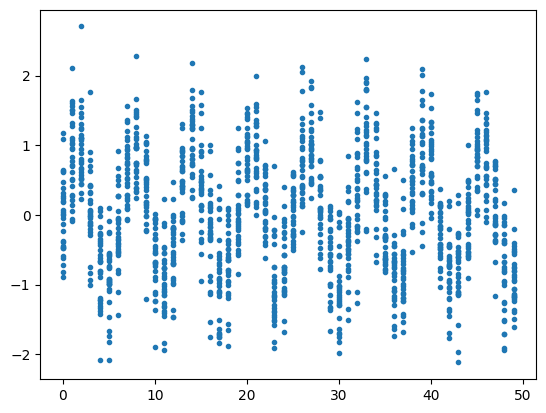

In [ ]:
x_cortege = []
y_cortege = []
for i in range(30):
     x_t, y_t = dataset_stohastic(mu, noise_sigma, data_size, i)
     x_cortege = np.append(x_cortege, x_t)
     y_cortege = np.append(y_cortege, y_t)
plt.plot(x_cortege,y_cortege,'.')
dataframe_cortege = {
    "t": x_cortege,
    "y": y_cortege
}
df = pd.DataFrame(dataframe_cortege)

print(df)

<Axes: xlabel='t', ylabel='y'>

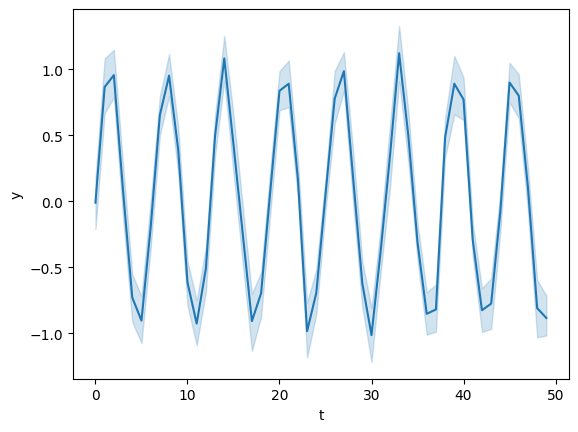

In [ ]:
seaborn.lineplot(x = "t", y= "y", data = df, markers = True)

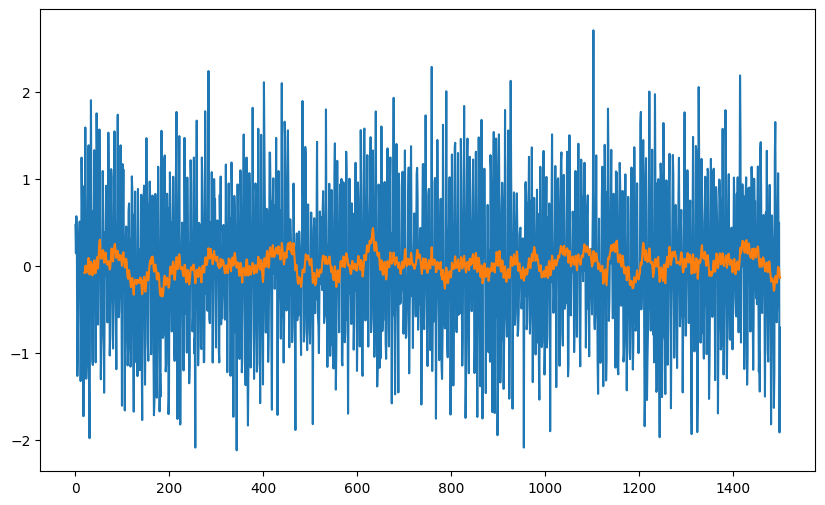

In [ ]:
df['y'].plot(figsize=(10,6))
df['y'].rolling(window = 20).mean().plot()
y_mean = df['y'].rolling(window = 20).mean()

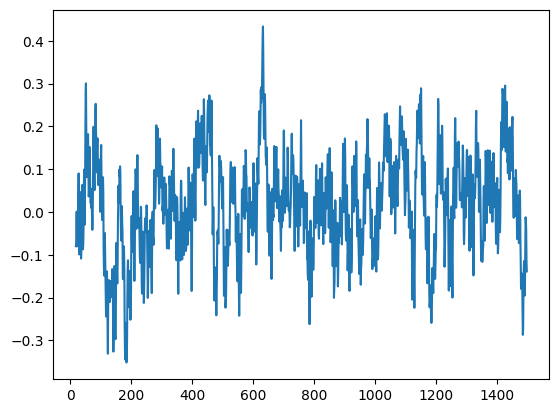

In [ ]:
plt.plot(y_mean)

# экспонента Хёрста и метод DFA

In [83]:
!pip install --quiet hurst

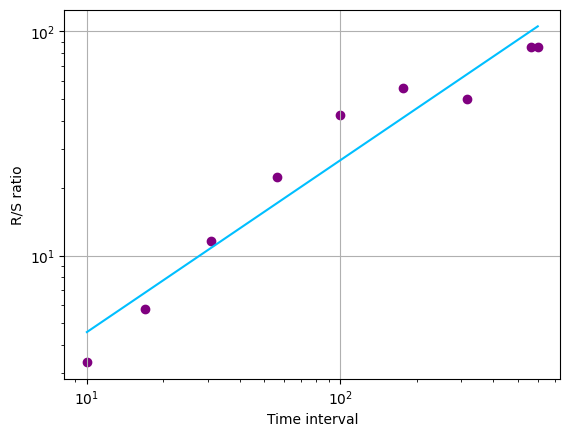

H=0.7669, c=0.7799


In [84]:
from hurst import compute_Hc
# Evaluate Hurst equation
H, c, data = compute_Hc(y, kind='change', simplified=False)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

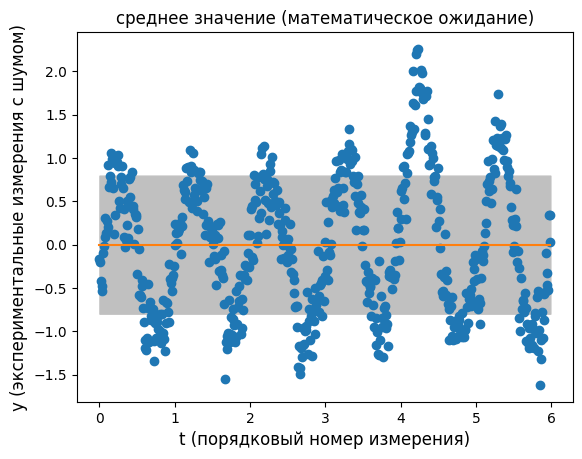

In [85]:
plt.plot(t, y, 'o')
plt.plot([t[0], t[-1]],[np.mean(y), np.mean(y)])
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y (экспериментальные измерения с шумом)', fontsize=12)
plt.title("среднее значение (математическое ожидание)")
plt.fill_between(t, np.mean(y) + np.std(y), np.mean(y) - np.std(y), color = "silver")
plt.show()

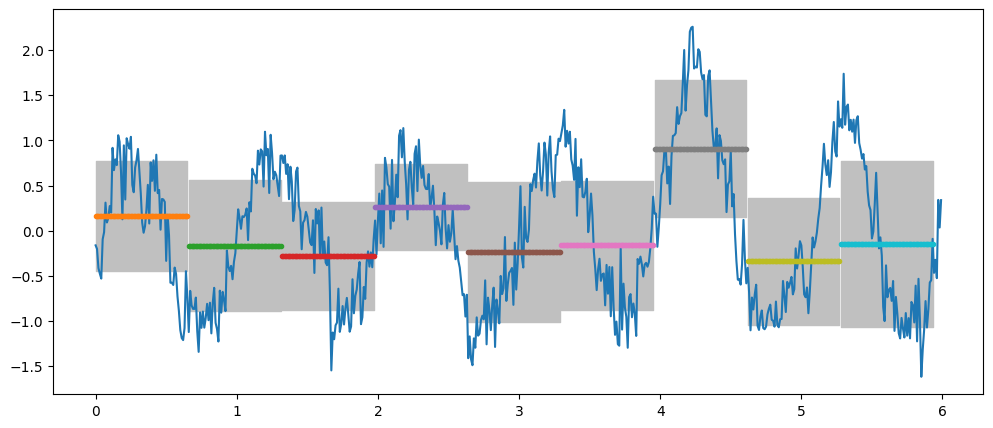

In [87]:
window_count = 9

len_int = int(len(y)/window_count)

plt.figure(figsize = (12,5))
plt.plot(t,y)

for i in range(0,window_count):
  window_idx = range(0+i*len_int,(1+i)*len_int)
  y_window = np.mean(y[window_idx]) * np.ones(len_int)
  plt.plot(t[window_idx], y_window,".")
  plt.fill_between(t[window_idx], np.mean(y_window) + np.std(y[window_idx]), np.mean(y_window) - np.std(y[window_idx]), color = "silver")



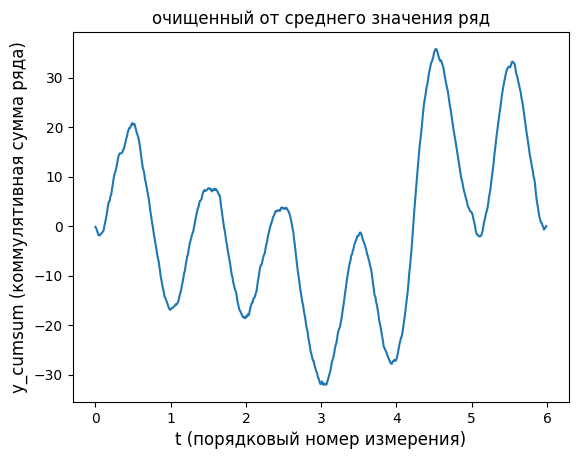

In [88]:
# сумма накопительным итогом (коммулятивная сумма осредненного ряда)
y_cumsum = []
y_cumsum = np.array([y[0] - np.mean(y)])
for i in range(1,len(y)):
  y_cumsum = np.append(y_cumsum, y_cumsum[i-1] + y[i] - np.mean(y))

plt.plot(t, y_cumsum)
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y_cumsum (коммулятивная сумма ряда)', fontsize=12)
plt.title('очищенный от среднего значения ряд')
plt.show()

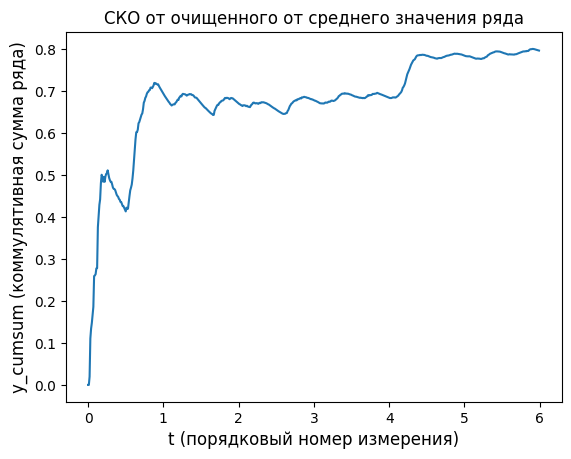

In [89]:
# СКО в зависимости от значения порядкового номера измерения
y_std = []
y_std = np.array([np.std(y[0]-np.mean(y))])
for i in range(1,len(y)):
  y_std = np.append(y_std, np.std(y[range(0,i)]-np.mean(y)))


plt.plot(t, y_std)
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y_cumsum (коммулятивная сумма ряда)', fontsize=12)
plt.title('СКО от очищенного от среднего значения ряда')
plt.show()

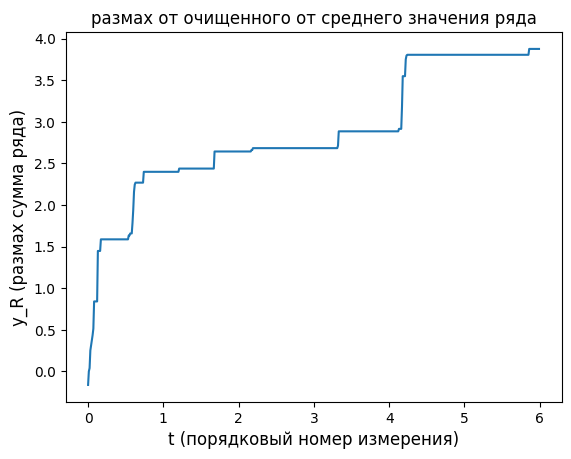

In [90]:
# Размаз в зависимости от значения порядкового номера измерения
y_R = []
y_R = np.array([(y[0]-np.mean(y))])
for i in range(1,len(y)):
  y_R= np.append(y_R, np.max(y[range(0,i)]) - np.min(y[range(0,i)]))


plt.plot(t, y_R)
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y_R (размах сумма ряда)', fontsize=12)
plt.title('размах от очищенного от среднего значения ряда')
plt.show()

<ipython-input-91-aef09d179bea>:1: RuntimeWarning: divide by zero encountered in divide
  RSstat = y_R / y_std
<ipython-input-91-aef09d179bea>:1: RuntimeWarning: invalid value encountered in divide
  RSstat = y_R / y_std


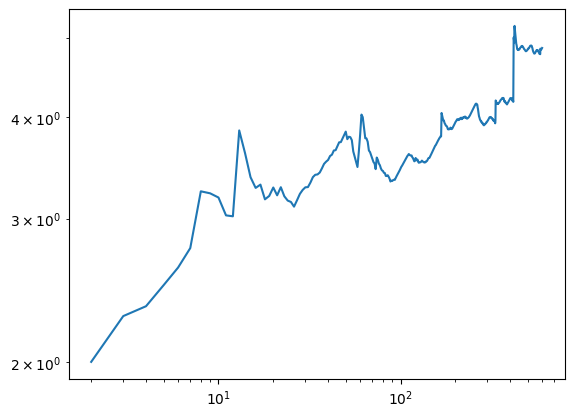

In [91]:
RSstat = y_R / y_std
plt.loglog(RSstat)

https://mfdfa.readthedocs.io

https://github.com/LRydin/MFDFA/blob/master/MFDFA/MFDFA.py


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


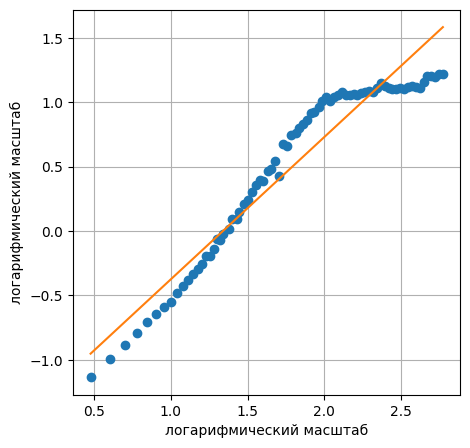

Estimated H = 1.105


In [92]:
# Imports
from MFDFA import MFDFA

# Select a band of lags, which usually ranges from
# very small segments of data, to very long ones, as
lag = np.unique(np.logspace(0.5, 3, 100, dtype=int))

# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
#lets consider only the monofractal case, so we need only 𝑞=2.
q = 2

# The order of the polynomial fitting
order = 1

# Obtain the (MF)DFA as
lag, dfa = MFDFA(y, lag = lag, q = q, order = order)

# To uncover the Hurst index, lets get some log-log plots

# And now we need to fit the line to find the slope
# in a double logaritmic scales, i.e., you need to
# fit the logs of the results

del_nan = np.argwhere(np.isnan(dfa))
dfa = np.delete(dfa,del_nan[:,0])
lag = np.delete(lag,del_nan[:,0])
H_hat, C_hat = np.polyfit(np.log10(lag)[0:-1],np.log10(dfa[0:-1]),1)

plt.figure(figsize=(5, 5))
plt.plot(np.log10(lag),np.log10(dfa),"o")
tlin = np.linspace(np.log10(lag[0]),np.log10(lag[-1]), num=100)
plt.plot(tlin, H_hat*tlin + C_hat)
plt.xlabel("логарифмический масштаб")
plt.ylabel("логарифмический масштаб")
plt.grid()
plt.show()

print('Estimated H = '+'{:.3f}'.format(H_hat))

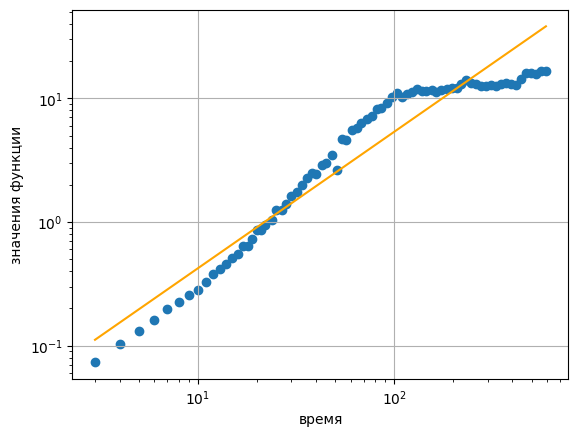

In [93]:
plt.loglog(10**(tlin), 10**(H_hat*tlin + C_hat), color = "orange")
plt.scatter(lag,dfa)
plt.xlabel("время")
plt.ylabel("значения функции")
plt.grid()
plt.show()

# Статистическая дисперсия и DFA из коробки




In [ ]:
from scipy import stats
def dfa(signal, scales):
    flucts = []
    for s in scales:
        windows = np.array([signal[i:i + s] for i in range(0, len(signal), s) if i + s <= len(signal)])
        detrended_windows = np.array([window - stats.linregress(np.arange(s), window)[0] * np.arange(s) - stats.linregress(np.arange(s), window)[1] for window in windows])
        F = np.sqrt(np.mean(detrended_windows**2, axis=1))
        flucts.append(np.mean(F))
    return np.array(flucts)

def sliding_window_std(signal, window_size):
    std_vals = np.array([np.std(signal[i:i+window_size]) for i in range(len(signal) - window_size + 1)])
    return std_vals

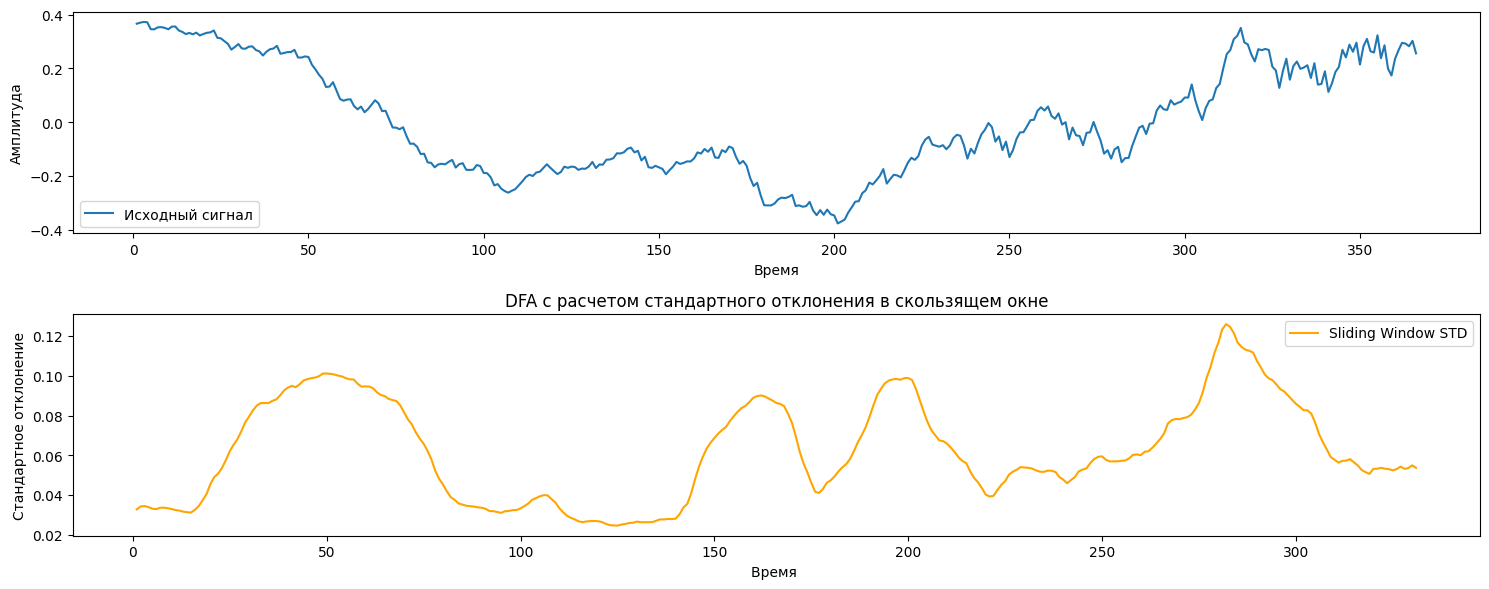

In [ ]:
window_size = int(len(y)/10)

std_vals = sliding_window_std(y, window_size)

plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t[:-(window_size-1)], std_vals, label='Sliding Window STD', color='orange')
plt.title('DFA с расчетом стандартного отклонения в скользящем окне')
plt.xlabel('Время ')
plt.ylabel('Стандартное отклонение')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
scales = np.arange(int(t[1]), int(t[-1]), 1)
flucts = dfa(y, scales)
log_scales = np.log10(scales)
log_flucts = np.log10(flucts)
hurst_exponent, _, _, _, _ = stats.linregress(log_scales, log_flucts)

<ipython-input-247-5adaffa5e2ab>:4: RuntimeWarning: divide by zero encountered in log10
  log_flucts = np.log10(flucts)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [ ]:
hurst_exponent

np.float64(nan)

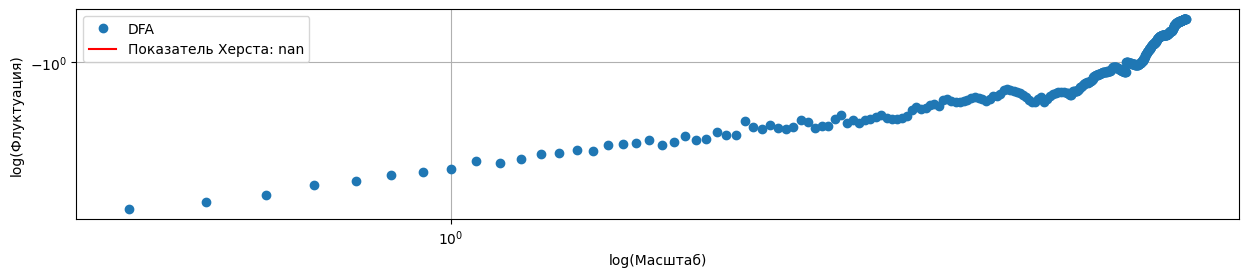

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(log_scales, log_flucts, 'o', label='DFA')
plt.plot(log_scales, hurst_exponent*log_scales + _, 'r', label=f'Показатель Херста: {hurst_exponent:.2f}')
plt.xscale("symlog")
plt.yscale("symlog")
plt.xlabel('log(Масштаб)')
plt.ylabel('log(Флуктуация)')
plt.grid()
plt.legend()

# **Пример обработки файла с историческими данными о курсе доллара к рублю**

In [ ]:
# загрузить последовательность из внешнего файла
# загрузить курс доллара
data_file = pd.read_csv("UsdRubTime.csv", sep = ';')

x_axis = 'Week'
y_axis = 'Close'

df_data = pd.DataFrame(data_file, columns = [x_axis, y_axis])

y = df_data[y_axis]
T = max(df_data[x_axis])
N = len(df_data[x_axis])
t = np.linspace(1, T, N)

In [ ]:
# обработка данных
print(df_usdrub.head)

print(N, T)

<bound method NDFrame.head of       index  timestamp   target
0      6759 1998-01-01     5,96
1      6758 1998-01-06    5,963
2      6757 1998-01-07    5,969
3      6756 1998-01-09    5,972
4      6755 1998-01-10    5,974
...     ...        ...      ...
6755      4 2025-03-25  83,8737
6756      3 2025-03-26   84,193
6757      2 2025-03-27  84,2065
6758      1 2025-03-28  83,8347
6759      0 2025-03-29  83,6813

[6760 rows x 3 columns]>
1542 1542


In [ ]:
# загрузить последовательность из внешнего файла
# загрузить курс доллара
data_file = pd.read_csv("VVP Russia.csv", sep = ';')

x_axis = 'Year'
y_axis = 'GDPusd'

df_data = pd.DataFrame(data_file, columns = [x_axis, y_axis])

y = df_data[y_axis]
T = max(df_data[x_axis])
N = len(df_data[x_axis])
t = np.linspace(1, T, N)

In [ ]:
# удалить все данные из файла, которые больше чем заданный параметр
df_data = df_data[df_data.Week > 350]

print(df_data.head)

<bound method NDFrame.head of       Week   Close
350    351  28.256
351    352  28.316
352    353  28.261
353    354  28.376
354    355  28.366
...    ...     ...
1537  1538  73.348
1538  1539  74.230
1539  1540  76.135
1540  1541  75.712
1541  1542  76.072

[1192 rows x 2 columns]>


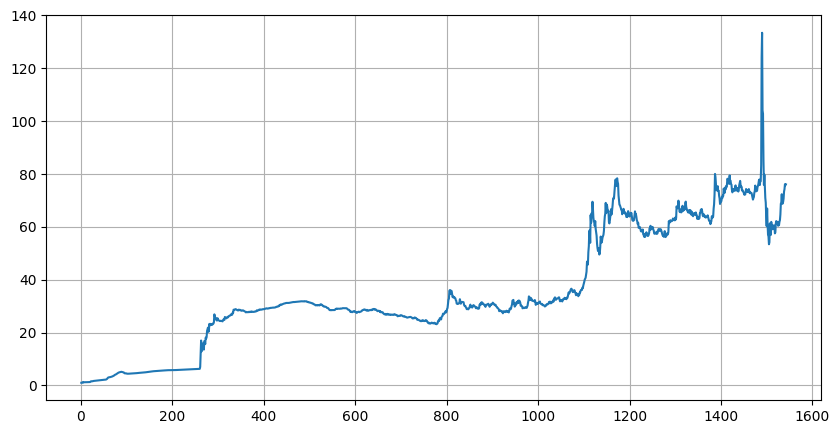

In [ ]:
# график временной зависимости
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(t, y)
plt.show()

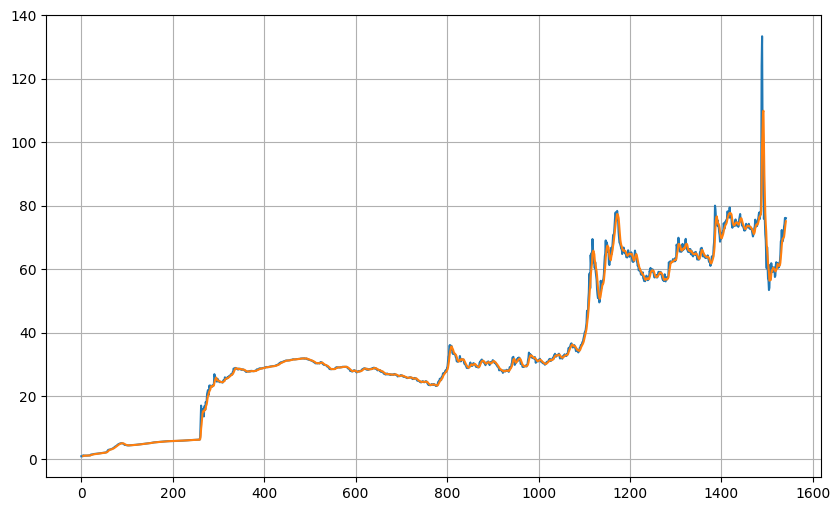

In [ ]:
# расчет скользящего среднего
y.plot(figsize=(10,6))
y.rolling(window = 5).mean().plot()
y_mean = y.rolling(window = 35).mean()
plt.grid()
plt.show()

In [ ]:
y_mean = y_mean[~np.isnan(y_mean)]
print(y_mean.head)

<bound method NDFrame.head of 34       1.381286
35       1.405486
36       1.430171
37       1.455200
38       1.480029
          ...    
1537    62.232971
1538    62.743371
1539    63.392829
1540    64.009029
1541    64.431314
Name: Close, Length: 1508, dtype: float64>


<function matplotlib.pyplot.show(close=None, block=None)>

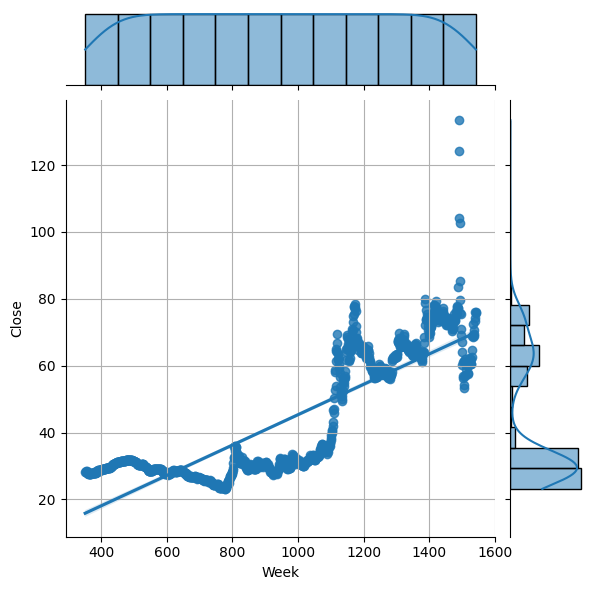

In [ ]:
seaborn.jointplot(data = df_data, x = x_axis, y = y_axis, kind='reg')
plt.grid()
plt.show

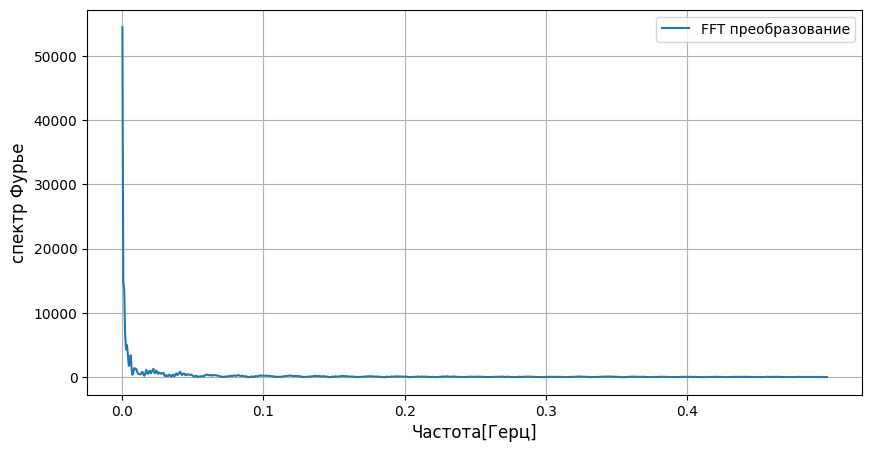

In [ ]:
from scipy.fft import fft, fftfreq

yf = fft(y.values)
xf = fftfreq(N, T/N)[:N//2]
# спект Фурье симметричен относительно нуля, поэтому берем только правую его часть
plt.figure(figsize=(10, 5))
plt.plot(xf, np.abs(yf[0:N//2]),label='FFT преобразование')
plt.xlabel('Частота[Герц]', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
plt.xticks(np.arange(0, np.max(xf), 0.1))
#plt.ylim(0,2000)
plt.grid()
plt.legend()
plt.show()

In [ ]:
# автокорреляция
import statsmodels.api as sm

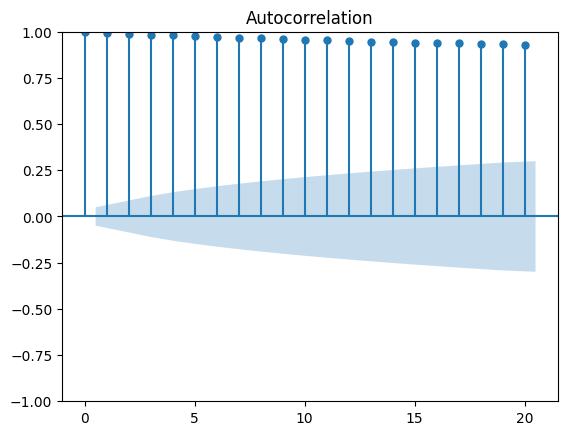

In [ ]:
sm.graphics.tsa.plot_acf(y, lags = 20, fft = True)
plt.show()

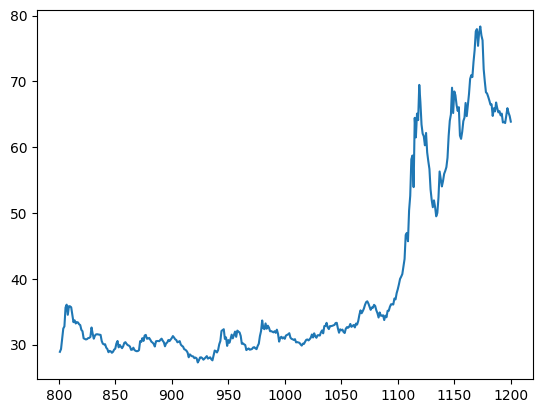

In [ ]:
plt.plot(t[800:1200], y[800:1200])


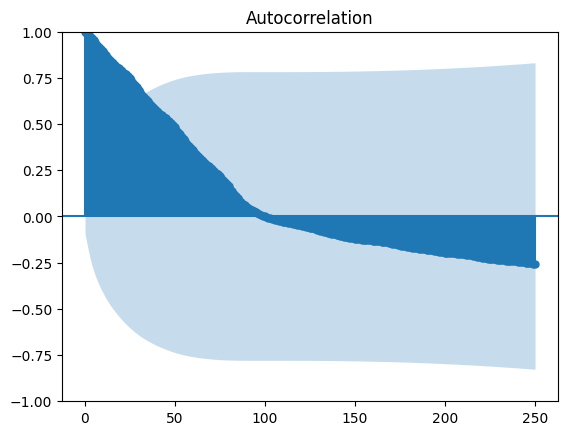

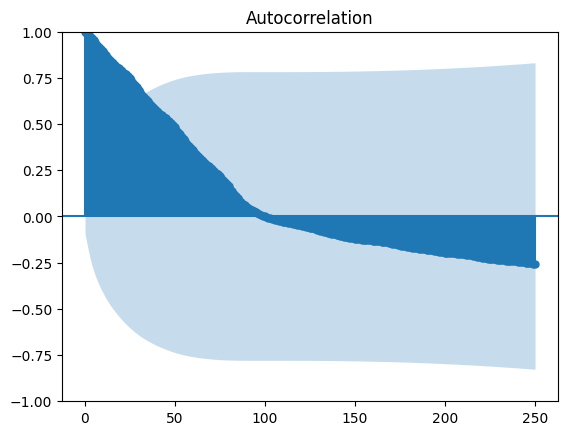

In [ ]:
sm.graphics.tsa.plot_acf(y[800:1200], lags = 250)


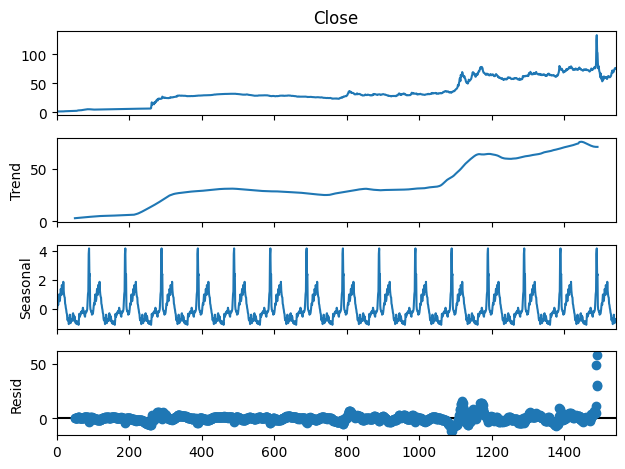

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(y, period = 100, model = "additive")
decompose.plot()


plt.show()

# Гипотеза Дикки-Фуллера
проверим, что ряд стационарный

In [ ]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(y, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

print('P-value', dfoutput[1])
print('The p-value is less than .05? we reject the null hypothesis. H0: The time series is non-stationary. ')

Results of Dickey-Fuller Test:
Test Statistic                   2.049784
p-value                          0.998734
#Lags Used                       0.000000
Number of Observations Used    365.000000
Critical Value (1%)             -3.448394
Critical Value (5%)             -2.869491
Critical Value (10%)            -2.571006
dtype: float64
P-value 0.9987342497214018
The p-value is less than .05? we reject the null hypothesis. H0: The time series is non-stationary. 


<ipython-input-165-f3de098a33c5>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('P-value', dfoutput[1])


#Higuchi's Fractal Dimension (HFD)

The range of values for HFD lie between 1 and 2.
1 for a simple curve
2 for a randomly distributed curve.

A value close to 1 indicates a smooth, low-complexity curve (e.g., a straight line or a simple periodic signal).
A value close to 2 indicates a highly irregular, noisy, or chaotic curve (approaching a space-filling behavior, like Brownian motion).

In [ ]:
#!/usr/bin/python3

"""
Higuchi Fractal Dimension according to:
T. Higuchi, Approach to an Irregular Time Series on the
Basis of the Fractal Theory, Physica D, 1988; 31: 277-283.
"""

import os
import ctypes
import numpy as np
from numpy.ctypeslib import ndpointer

def curve_length(X,opt=False,num_k=50,k_max=None):
    """
    Calculate curve length <Lk> for Higuchi Fractal Dimension (HFD)

    Input:

    X - input (time) series (must be 1D, to be converted into a NumPy array)
    opt (=True) - optimized? (if libhfd.so was compiled uses the faster code).
    num_k - number of k values to generate.
    k_max - the maximum k (the k array is generated uniformly in log space
            from 2 to k_max)
    Output:

    k - interval "times", window sizes
    Lk - curve length
    """
    ### Make sure X is a NumPy array with the correct dimension
    X = np.array(X)
    if X.ndim != 1:
        raise ValueError("Input array must be 1D (time series).")
    N = X.size

    ### Get interval "time"
    k_arr = interval_t(N,num_val=num_k,kmax=k_max)

    ### The average length
    Lk = np.zeros(k_arr.size)

    ### C library
    if opt:
        X = np.require(X, float, ('C', 'A'))
        k_arr = np.require(k_arr, ctypes.c_size_t, ('C', 'A'))
        Lk = np.require(Lk, float, ('C', 'A'))
        ## Load library here
        libhfd = init_lib()
        ## Run the C code here
        libhfd.curve_length(k_arr,k_arr.size,X,N,Lk)

    else:
        ### Native Python run
        for i in range(k_arr.size):# over array of k's
            Lmk = 0.0
            for j in range(k_arr[i]):# over m's
                ## Construct X_k^m, i.e. X_(k_arr[i])^j, as X[j::k_arr[i]]
                ## Calculate L_m(k)
                Lmk += (
                    np.sum(
                        np.abs(
                            np.diff( X[j::k_arr[i]] )
                        )
                    )
                    * (N - 1) /
                    (
                        ( (N-j-1)//k_arr[i] )
                        *
                        k_arr[i]
                    )
                ) / k_arr[i]

            ### Calculate the average Lmk
            Lk[i] = Lmk / k_arr[i]

    return (k_arr, Lk);

def lin_fit_hfd(k,L,log=True):
    """
    Calculate Higuchi Fractal Dimension (HFD) by fitting a line to already computed
    interval times k and curve lengths L

    Input:

    k - interval "times", window sizes
    L - curve length
    log (=True) - k and L values will be transformed to np.log2(k) and np.log2(L),
                  respectively

    Output:

    HFD
    """
    if log:
        return (-np.polyfit(np.log2(k),np.log2(L),deg=1)[0]);
    else:
        return (-np.polyfit(k,L,deg=1)[0]);

def hfd(X,**kwargs):
    """
    Calculate Higuchi Fractal Dimension (HFD) for 1D data/series

    Input:

    X - input (time) series (must be 1D, to be converted into a NumPy array)

    Output:

    HFD
    """
    k, L = curve_length(X,**kwargs)
    return lin_fit_hfd(k, L);

def interval_t(size,num_val=50,kmax=None):
    ### Generate sequence of interval times, k
    if kmax is None:
        k_stop = size//2
    else:
        k_stop = kmax
    if k_stop > size//2:## prohibit going larger than N/2
        k_stop = size//2
        print("Warning: k cannot be longer than N/2")

    k = np.logspace(start=np.log2(2),stop=np.log2(k_stop),base=2,num=num_val,dtype=int)
    return np.unique(k);

def init_lib():
    libdir = os.path.dirname(__file__)
    libfile = os.path.join(libdir, "libhfd.so")
    lib = ctypes.CDLL(libfile)

    rwptr = ndpointer(float, flags=('C','A','W'))
    rwptr_sizet = ndpointer(ctypes.c_size_t, flags=('C','A','W'))

    lib.curve_length.restype = ctypes.c_int
    lib.curve_length.argtypes = [rwptr_sizet, ctypes.c_size_t, rwptr, ctypes.c_size_t, rwptr]

    return lib;

In [ ]:
hfd(y_nontrend)
print(hfd(y_nontrend))

1.3682956534556308


## 3 type of stochastic signal

In [ ]:
z = np.linspace(0,1,1000)

In [ ]:
import numpy as np
#import HiguchiFractalDimension as hfd

x = np.random.randn(10000)
y = np.empty(9900)
z = np.linspace(0,1,1000)
for i in range(x.size-100):
	y[i] = np.sum(x[:(i+100)])

## Note x is a Guassian noise, y is the original Brownian data used in Higuchi, Physica D, 1988.
## z - is a just linearity)

hfd(x) # ~ 2.00
hfd(y) # ~ 1.50
hfd(z) # = 1
hfd(y_nontrend)
print(hfd(x), hfd(y), hfd(z), hfd(y_nontrend))

1.999874566815698 1.4905649864640167 1.0000000000000004 1.9931507235057702


# Maximum Lyapunov Exponent (MLE)

https://github.com/sreguyal/lyapunov-exponent-estimate/blob/main/LyapunovEstimateTest.ipynb

\begin{equation}
 |\delta \mathbf{Z}(t)| \approx e^{\lambda t}\left|\delta \mathbf{Z}_{0}\right|
\end{equation}